In [1]:
import torch
import torchvision
from torchvision import transforms,datasets

In [2]:
train=datasets.MNIST("",train=True,download=True,
                    transform=transforms.Compose([transforms.ToTensor()]))
test=datasets.MNIST("",train=False,download=True,
                    transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
trainset=torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset=torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

In [4]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [5]:
#zero segment is image
#1 segment label
x=data[0][1] #image  er second image value
y=data[1][1] # label er second value

In [6]:
print(y)

tensor(5)


In [7]:
x.shape

torch.Size([1, 28, 28])

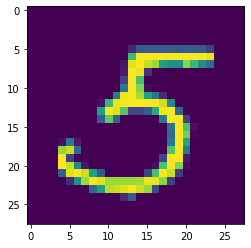

In [8]:
#show 1

import matplotlib.pyplot as plt


plt.imshow(x.squeeze())
plt.show()

# Create CNN  

In [9]:
import torch.nn as nn
import torch.nn.functional as F

In [10]:
class Net(nn.Module): # Module is library package
    
    def __init__(self):
        super().__init__()
        
        self.conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5,stride=1)
        self.conv2=nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5,stride=1)
       
        self.fc1=nn.Linear(12*4*4, 64)   # last conv_channel=12, input=192
        self.fc2=nn.Linear(64,10)  
        
        
    def forward(self,x): # pass the data
        
        x=x
        
        x=self.conv1(x)
        x=F.relu(x)
        x=F.max_pool2d(x,kernel_size=2,stride=2)
 
        x=self.conv2(x)
        x=F.relu(x)
        x=F.max_pool2d(x,kernel_size=2,stride=2)
        
        
        
        x = x.reshape(-1,12*4*4) #(-1) 2d to 1d
        print(x.shape)
        x = self.fc1(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output
        
               

net=Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [11]:
import torch.optim as optim
optimizer=optim.Adam(net.parameters(),lr=0.001)

In [12]:
for data in trainset:
    X,y=data
    print(x.size())
    break

torch.Size([1, 28, 28])


In [13]:
Epoch=3

for epoch in range(Epoch): # how many times we want to iterate
    
    for data in trainset:
        X,y=data
        
        net.zero_grad()
        
        output=net(X)  # pass data to nn
        
        loss=F.nll_loss(output,y)  #calculate loss
        
        loss.backward()
        
        optimizer.step()
    
    
    

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

In [14]:
for data1 in testset:
    print(data1)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [18]:
x_test=data1[0][1] #image  er second image value
y_test=data1[1][1] # label er second value

In [33]:
net.eval()
with torch.no_grad():

    for images, labels in testset:
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        print(predicted==labels)
        break
        

torch.Size([10, 192])
tensor([True, True, True, True, True, True, True, True, True, True])


In [19]:
y_test

tensor(7)

In [27]:
net.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testset:
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))


torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size([10, 192])
torch.Size

In [27]:
t = torch.tensor([[[1, 2],
                       [3, 4]],
                      [[5, 6],
                       [7, 8]]])
torch.flatten(t)


tensor([1, 2, 3, 4, 5, 6, 7, 8])

In [28]:
torch.flatten(t, start_dim=1)


tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])